In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import csv, glob, os, sys
from sklearn import svm

plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

#filename = 'day7_run1_samples9_points150.csv' # designate filename
#rawdf = pd.read_table(filename, error_bad_lines=False, delimiter = ',') #read in file
#print(rawdf)

In [13]:

refs = np.array([9.5, 4.4, 6.5, 11.65]) #ref resistances for mq2, mq4, mq5, mq7


conc = np.arange(10,10000,20) #gas concentration array

In [14]:
refs

array([  9.5 ,   4.4 ,   6.5 ,  11.65])

In [44]:
# each sensor's calibration data was fit to a double exponential curve so that an 
# arbitrary number of calibration points could be extracted from it

# the dictionary holds the parameters of each double exponential fit
# in the order y0, a1, t1, a2, t2 where y = y0 + a1*exp(-x/t1) + a2*exp(x/t2)

mq2_dict = {'h2': [0.318123, 1.88473, 271.34, 0.929687, 2432.92],
           'alcohol': [0.588893, 2.18492, 303.187, 1.2193, 3409.37],
           'ch4': [0.651854, 1.99089, 315.599, 1.43752, 2821.72],
           'co': [1.26604, 3.11513, 426.056, 2.0575, 3824.78],
           'lpg': [0.239745, 1.37166, 299.05, 0.704322, 2652.01],
           'air': 9.4}
    
mq4_dict = {'h2': [1.8423, 1.0358, 2020.3, 1.0358, 2469.26],
           'alcohol': [3.00939, 0.525979, 2290.73, 0.525979, 2799.78],
           'ch4': [0.43202, 0.72647, 1728.3, 0.72647, 2112.37],
           'co': [3.47875, 0.439048, 1754.47, 0.439048, 2144.35],
           'lpg': [0.727586, 1.01585, 1686.73, 1.01585, 2061.56],
           'air': 4.2}

mq5_dict = {'h2': [0.660918, 1.4682, 244.54, 0.466523, 2061.83],
           'alcohol': [1.05519, 1.47615, 470.084, 1.51108, 7292.54],
           'ch4': [0.190975, 0.716443, 307.443, 0.405539, 2990.86],
           'co': [2.30735, 2.51246, 123.585, 1.29863, 1297.69],
           'lpg': [0.140381, 0.574494, 308.978, 0.270937, 2760.4],
           'air': 6.3}

mq7_dict = {'h2': [0.0512092, 0.68861, 378.743, 0.68861, 462.908],
           'alcohol': [11.9931, 2.18054, 465.188, 2.18054, 568.563],
           'ch4': [ 8.88593, 2.50389, 680.41, 2.50389, 831.612],
           'co': [0.0896196, 0.842582, 393.495, 0.842582, 480.938],
           'lpg': [4.91086, 2.18126, 516.483, 2.18126, 631.257],
           'air': 25}

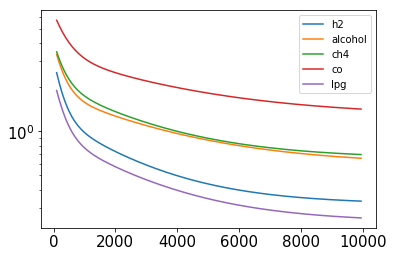

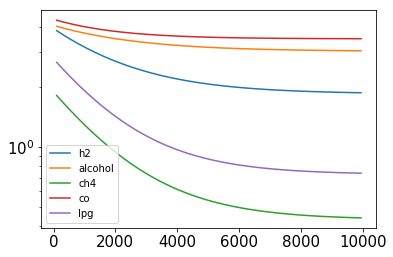

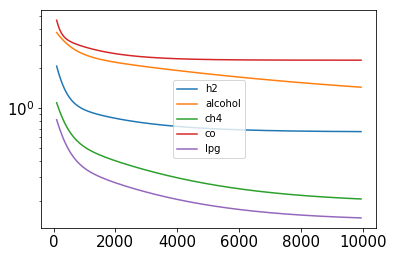

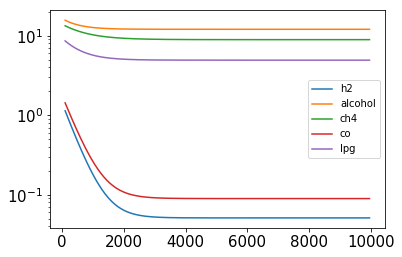

In [51]:
x = np.arange(100,10000,50)

for sensor in [mq2_dict, mq4_dict, mq5_dict, mq7_dict]:
    for analyte in list(sensor)[:5]:
        d_exp = sensor[analyte]
        y = d_exp[0] + d_exp[1]*np.exp(-x/d_exp[2]) + d_exp[3]*np.exp(-x/d_exp[4])
        plt.semilogy(x, y, label=analyte)
    plt.legend()
    plt.show()


In [20]:
list(mq2_dict)[1]

'alcohol'

In [10]:
list(testd)[1][1]

'9'